# Logistic Regression on Titanic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

First we clean all the data.

In [2]:
def normalisation(feature):
    return (feature - feature.mean()) / feature.std()

In [3]:
titanic = pd.read_csv('./titanic.csv', index_col=0)

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True) # replace Null value with the mean for the age
titanic['Age'] = normalisation(titanic['Age'])

# replace the sex with a binary value
titanic['Sex'].replace(to_replace=['female','femme'],value=0, inplace=True) 
titanic['Sex'].replace(['male', 'homme'], 1 , inplace=True)

# replace O with 0 to have a binary value  
titanic['Survived'].replace(['O'], 0, inplace=True)
titanic['Survived'].fillna(0, inplace=True)
titanic['Survived'] = titanic['Survived'].astype('int')

titanic['isKid']=0
titanic.loc[titanic.Age<16,'isKid']=1
titanic['isAlone']=0
titanic.loc[(titanic.SibSp==0)&(titanic.Parch==0),'isAlone']=1

titanic = pd.concat([titanic, pd.get_dummies(titanic['Pclass'], prefix='Pclass'), pd.get_dummies(titanic['Sex'], prefix='Sex'), pd.get_dummies(titanic['Embarked'], prefix='Embarked')], axis=1)
titanic.drop(columns=['Pclass', 'Sex', 'Cabin', 'Embarked'], inplace=True)

titanic.head(20)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,isKid,isAlone,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",-5.921480e-01,1,0,A/5 21171,7.2500,1,0,0,0,1,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",6.384304e-01,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,1,0,0
3,1,"Heikkinen, Miss. Laina",-2.845034e-01,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1,1,0,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4.076970e-01,1,0,113803,53.1000,1,0,1,0,0,1,0,0,0,1
5,0,"Allen, Mr. William Henry",4.076970e-01,0,0,373450,8.0500,1,1,0,0,1,0,1,0,0,1
6,0,"Moran, Mr. James",4.371893e-15,0,0,330877,8.4583,1,1,0,0,1,0,1,0,1,0
7,0,"McCarthy, Mr. Timothy J",1.869009e+00,0,0,17463,51.8625,1,1,1,0,0,0,1,0,0,1
8,0,"Palsson, Master. Gosta Leonard",-2.130371e+00,3,1,349909,21.0750,1,0,0,0,1,0,1,0,0,1
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",-2.075923e-01,0,2,347742,11.1333,1,0,0,0,1,1,0,0,0,1


In [4]:
titanic.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'isKid',
       'isAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## From Scratch

In [5]:
def sigmoid(x, theta):
    z = np.dot(x, theta)
    return 1 / (1 + np.exp(-z))

In [6]:
def cost_function(X, y, theta):
    h = sigmoid(X, theta)
    loss = (-y * np.log(h) - (1-y)* np.log(1-h)).mean()
    return loss

In [7]:
def gradient_descent(X, y, params, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros((iterations, 1))
    
    for i in range(iterations):
        pred = sigmoid(X,params)
        loss = pred - y
        
        grad = np.dot(X.T, loss)
        params = params - learning_rate * grad * 1/m
        
        params = params - (learning_rate/m) * grad
        cost_history[i] = cost_function(X,y,params)
        
    return (cost_history, params)

In [8]:
def predict(X, y, params):
    costs, w = gradient_descent(X,y, params)
    y_pred=sigmoid(X,w)
    classify=[1 if i > 0.5 else 0 for i in y_pred]
    return classify

78.33 % regression train.
81.34 % regression test.

Initial Cost is: 0.6931471805599454
Final Cost is: 0.47246519783840224


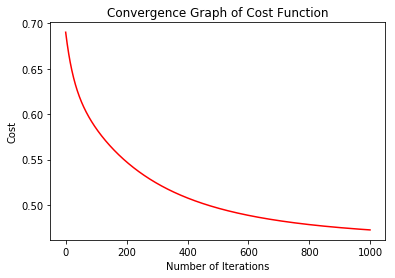

In [31]:
X = titanic[['Age', 'Sex_0','Sex_1', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C','Embarked_Q', 'Embarked_S', 'isKid', 'isAlone']]
y = np.array(titanic[['Survived']])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

m = len(y_train)
n = len(y_test)

X_train = np.hstack((np.ones((m,1)),X_train))
X_test = np.hstack((np.ones((n,1)),X_test))
params = np.zeros((X_train.shape[1],1))

initial_cost = cost_function(X_train, y_train, params)

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params)
print(round(metrics.accuracy_score(y_train, predict(X_train,y_train, params_optimal))* 100, 2), '% regression train.')
print(round(metrics.accuracy_score(y_test, predict(X_test,y_test, params_optimal))* 100, 2), '% regression test.\n')

final_cost = cost_history[-1][0]

print("Initial Cost is:", initial_cost)
print("Final Cost is:", final_cost)

plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Classification librairies


### Scikit Learn

In [73]:
logisticRegScikit = LogisticRegression()
X = titanic[['Age', 'Sex_0','Sex_1', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C','Embarked_Q', 'Embarked_S', 'isKid', 'isAlone']]
Y = titanic[['Survived']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

X_train
logisticRegScikit.fit(X_train,Y_train)
logisticRegScikit.predict(X_train)


print(round(logisticRegScikit.score(X_train, Y_train) * 100, 2),'% regression train.\n')
print(round(logisticRegScikit.score(X_test,Y_test) * 100, 2),'% regression test.\n')

79.78 % regression train.

76.87 % regression test.



/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision tree

In [74]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
prediction_survived_tree = tree.predict(X_train)
print(round(tree.score(X_train, Y_train) * 100, 2),'% tree train.\n')
print(round(tree.score(X_test,Y_test) * 100, 2),'% tree test.\n')

93.42 % tree train.

72.76 % tree test.

